# Visualisation frameworks in python

There are many visualisation frameworks in Pyhton. 
* A library `matplotlib` is a common foundation on which many frameworks are built.
* The best library for data visualisation is `ggplot2` in `GNU R` as it uses declarative language and its visual appearance has been polished in many years. Fortunately there is a Python port `plotnine` that is 95% feature complete.
* If you do not like the declarative programming style of `ggplot`, you can always use `matplotlib` and `seaborn`.

## I. Philosophy behind ggplot

* You do not specify the exact details of the visualisation
* Instead you specify how you want the data to be visualised


## II. How to use plotnine 

In [2]:
import pandas as pd
import numpy as np
from plotnine import *

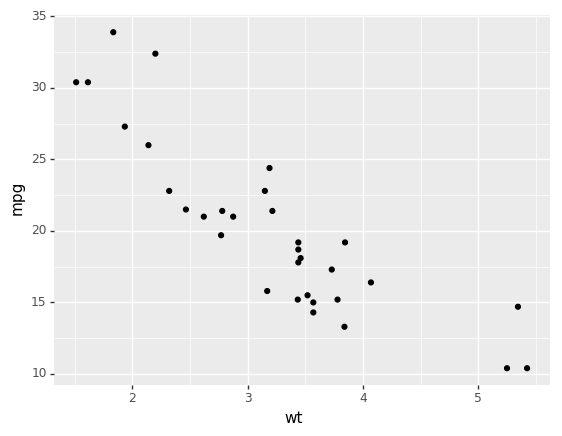

<ggplot: (-9223372029309706012)>

In [3]:
(ggplot(mtcars, aes('wt', 'mpg'))
 + geom_point())

In [4]:
from pandas import DataFrame
from pandas import Series

In [5]:
a = Series(['a', 'b'])
b = Series(['c', 'd', 'e'])

In [9]:
df = pd.DataFrame({'Year': ['2014', '2015'], 'quarter': ['q1', 'q2']})
df['period'] = df[['Year', 'quarter']].apply(lambda x: ''.join(x), axis=1)
df

,Year,quarter,period
0,2014,q1,2014q1
1,2015,q2,2015q2


In [7]:
%config IPCompleter.greedy=True

In [37]:
import itertools as it
from typing import Dict, List, Any

In [23]:
DataFrame(list(itertools.product(['a', 'b'], ['c', 'd', 'e'], ['u', 'v'])), columns=['a', 'b', 'c'])

,a,b,c
0,a,c,u
1,a,c,v
2,a,d,u
3,a,d,v
4,a,e,u
5,a,e,v
6,b,c,u
7,b,c,v
8,b,d,u
9,b,d,v


In [38]:
def combine_categories(cat_dict:Dict[str, List[Any]]) -> DataFrame:
    return DataFrame(list(it.product(*cat_dict.values())), columns = cat_dict.keys())
    

In [39]:
combine_categories({'a':['a', 'b'], 'b':['c', 'd', 'e'], 'c':['a']})

,a,b,c
0,a,c,a
1,a,d,a
2,a,e,a
3,b,c,a
4,b,d,a
5,b,e,a


In [43]:
def head(df: DataFrame, *args, **kwargs) -> DataFrame:
    return df.head( *args, **kwargs)
def tail(df: DataFrame, *args, **kwargs) -> DataFrame:
    return df.tail( *args, **kwargs)

In [45]:
tail(df, 1)

,Year,quarter,period
1,2015,q2,2015q2


In [48]:
from pandas.api.types import CategoricalDtype
t = CategoricalDtype(categories=['b', 'a'], ordered=True)

In [55]:
list(it.product(t.categories.values,t.categories.values)) 

[('b', 'b'), ('b', 'a'), ('a', 'b'), ('a', 'a')]

## III. How to use seaborn 
This is just for comparison


In [ ]:
cat_dict.values()

In [ ]:
https://medium.com/@gscheithauer/data-visualization-in-python-like-in-rs-ggplot2-bc62f8debbf5

In [ ]:
https://github.com/has2k1/plotnine
https://plotnine.readthedocs.io/en/stable/

In [ ]:
seaborn make sure that data is float otherwise you get random errors

In [ ]:
https://wckdouglas.github.io/2016/12/seaborn_annoying_title

In [ ]:
https://stackoverflow.com/questions/32899463/how-can-i-overlay-two-graphs-in-seaborn

In [ ]:
https://stackoverflow.com/questions/44261803/change-line-style-in-seaborn-facet-grid

In [ ]:
https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html

### Displaying results

Lets draw faceted plots for showing large and small scale changes

Note that `seaborn.FacetGrid` provides three channels for spliting data:
* `col` -- into which column the data goes
* `ŗow` -- into which row the data goes
* `hue` -- how the data is colored in the graph

As we want to split data according to four categories:
* dataset dimensionality
* the type of labelling function
* machine learning method
* behaviour on test and train data
we must cheat and combine last two categories into single `hue` channel

To get desired visual separation we must manually control aestetics of four hue groups.
It is a bit hacky but we get the things done.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

%matplotlib inline

# Manual control of hue groups
hue_order = ['LR-test', 'LR-train', 'MV-test', 'MV-train']
hue_kws = {'color':      ['blue', 'orange', 'blue', 'orange'], 
           'marker':     ['X', 'X', '.', '.'],
           'linestyle':  ['-', '-', '-.', '-.']
          }

In [ ]:
df = (error.loc[error['size'].isin([10, 1000, 2000, 3000, 4000, 5000]),:]
      .assign(hue = lambda df: combine_columns(df, ['method', 'type'], "-")))

fg = sns.FacetGrid(df, col="dim", row="fit", hue = "hue", 
                   hue_order=hue_order, hue_kws=hue_kws,
                   margin_titles = True)
fg.map(plt.plot, "size", "accuracy")
fg.map(plt.scatter, "size", "accuracy")
fg.add_legend(title = "Accuracy")

In [ ]:
df = (error.loc[error['size'] <= 1000,:]
      .assign(hue = lambda df: combine_columns(df, ['method', 'type'], "-")))

fg = sns.FacetGrid(df, col="dim", row="fit", hue = "hue", 
                   hue_order=hue_order, hue_kws=hue_kws,
                   margin_titles = True)
fg.map(plt.plot, "size", "accuracy", marker ='s')
fg.map(plt.scatter, "size", "accuracy")
fg.add_legend(title = "Accuracy")

## Leftovers

In [ ]:
seaborn make sure that data is float otherwise you get random errors

In [ ]:
https://wckdouglas.github.io/2016/12/seaborn_annoying_title

In [ ]:
https://stackoverflow.com/questions/32899463/how-can-i-overlay-two-graphs-in-seaborn

In [ ]:
https://stackoverflow.com/questions/44261803/change-line-style-in-seaborn-facet-grid